In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
filename = 'NCAA_data.csv'
data = pd.read_csv(filename)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 15 columns):
Rk        68 non-null int64
School    68 non-null object
Conf      68 non-null object
W         68 non-null int64
L         68 non-null int64
Pts       68 non-null float64
Opp       68 non-null float64
MOV       68 non-null float64
SOS       68 non-null float64
OSRS      68 non-null float64
DSRS      68 non-null float64
SRS       68 non-null float64
ORtg      68 non-null float64
DRtg      68 non-null float64
NRtg      68 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 8.0+ KB


# Glossary
- **Rk** -- Rank
 - **School** -- * = NCAA Tournament appearance
 - **Conf** -- Conference
 - **W** -- Wins
 - **L** -- Losses
 - **Pts** -- Points Per Game
 - **Opp** -- Opponent Points Per Game
 - **MOV** -- Margin of Victory = Pts - Opp
 - **SOS** -- Strength of Schedule 
   - A rating of strength of schedule. The rating is denominated in points above/below average, where zero is average. Non-Division I games are excluded from the ratings.
 - **SRS**
   - **OSRS** -- The offensive component of the Simple Rating System (SRS) 
     - A rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average. Non-Division I games are excluded from the ratings.
   - **DSRS** -- The defensive component of the Simple Rating System (SRS) 
     - A rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average. Non-Division I games are excluded from the ratings.
   - **SRS** -- Simple Rating System
       - A rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average. Non-Division I games are excluded from the ratings.
 - **Adjusted**
   - **ORtg** -- Offensive Rating = 100 * (PTS / Poss)
     - An estimate of points scored (for teams) or points produced (for players) per 100 possessions.
   - **DRtg** -- Defensive Rating = 100 * (Opp PTS / Poss)
     - An estimate of points allowed per 100 possessions.
   - **NRtg** -- Net Rating = 100 * ((PTS - Opp PTS) / Poss))
     - An estimate of point differential per 100 possessions.

In [4]:
print(data.head())

   Rk          School     Conf   W  L   Pts   Opp    MOV    SOS   OSRS   DSRS  \
0   1         Gonzaga      WCC  33  4  87.6  64.9  22.78   5.02  18.60   9.21   
1   2            Duke      ACC  32  6  82.7  67.8  14.92  11.97  17.52   9.37   
2   3        Virginia      ACC  34  3  71.1  55.5  15.51   9.80   4.38  20.93   
3   4  Michigan State  Big Ten  32  7  77.6  65.0  12.59  12.35  12.95  11.98   
4   5  North Carolina      ACC  29  7  85.8  73.2  12.58  11.35  19.82   4.11   

     SRS    ORtg   DRtg   NRtg  
0  27.80  125.15  86.20  38.95  
1  26.89  121.57  84.18  37.39  
2  25.31  124.16  84.71  39.45  
3  24.94  122.59  86.19  36.40  
4  23.93  120.59  88.17  32.42  


# Those who Score

In [17]:
print('**All numbers rounded**')
print("The average team scores {:.0f} points/game,\n99% of teams score {:.0f} points/game or less,\nwhile the highest points/game average is {:.0f}, which belongs to rank 1.".format(data['Pts'].mean(),data['Pts'].quantile(0.99), data['Pts'].max()))

**All numbers rounded**
The average team scores 75 points/game,
99% of teams score 87 points/game or less,
while the highest points/game average is 88, which belongs to rank 1.


### Plot Wins and Points:

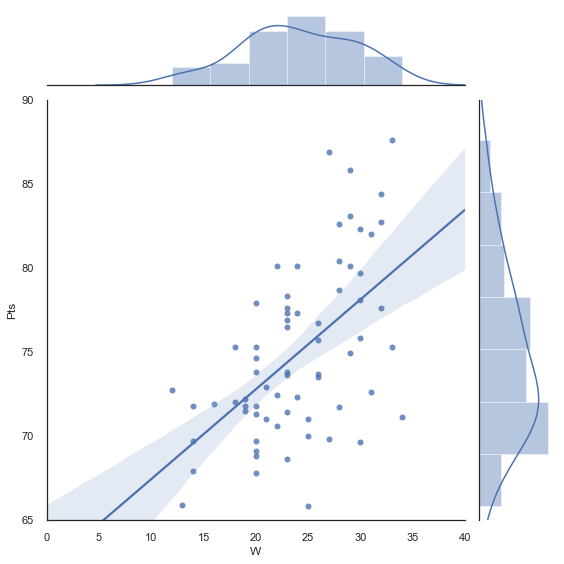

In [69]:
sns.jointplot("W", "Pts", data=data, kind="reg", xlim=(0, 40), ylim=(65, 90), color="b", height=8)

Clear correlation between average points/game and wins

### Plot Wins and Net Rating:

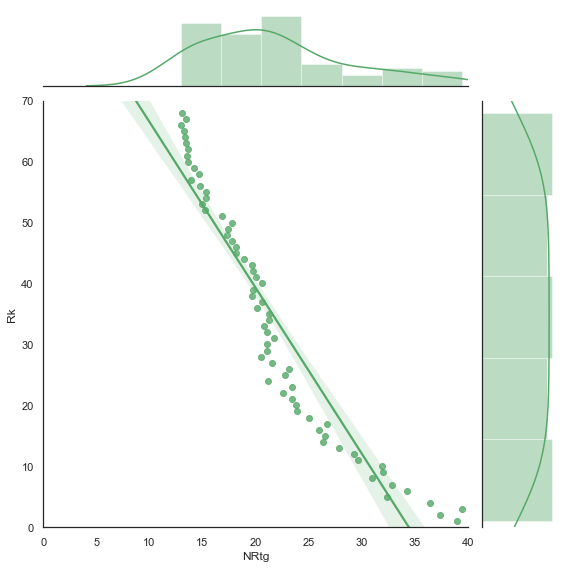

In [12]:
sns.jointplot("NRtg", "Rk", data=data, kind="reg", xlim=(0, 40), ylim=(0,70), color="g", height=8)

### Plot Wins and Rank

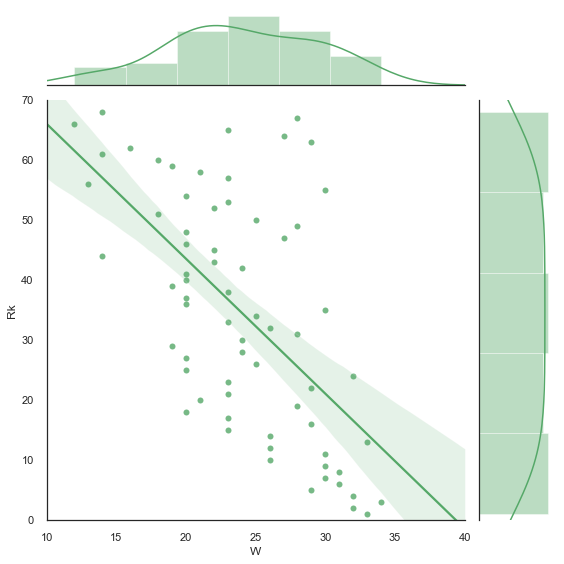

In [83]:
sns.jointplot("W", "Rk", data=data, kind="reg", xlim=(10,40), ylim=(0,70), color="g", height=8)

### Plot

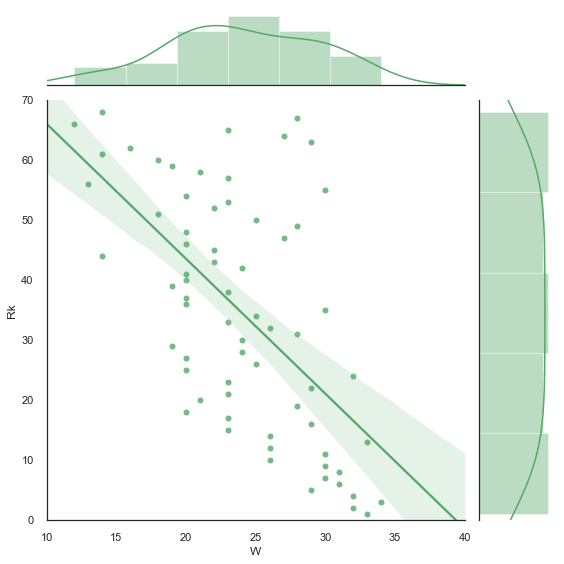

In [99]:
sns.jointplot("W", "Rk", data=data, kind="reg", xlim=(10,40), ylim=(0,70), color="g", height=8)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


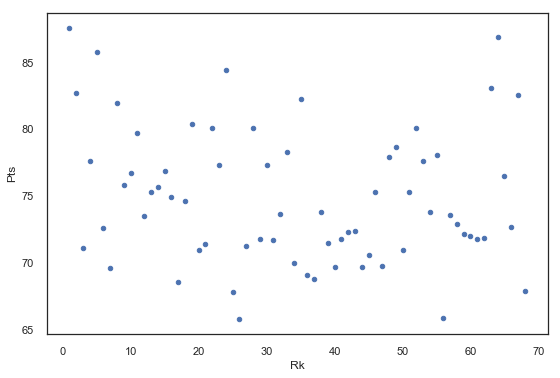

In [104]:
data.plot.scatter('Rk','Pts')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


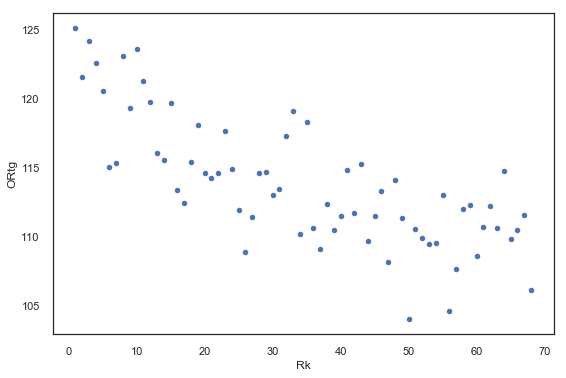

In [94]:
data.plot.scatter(x= 'Rk', y= 'ORtg')

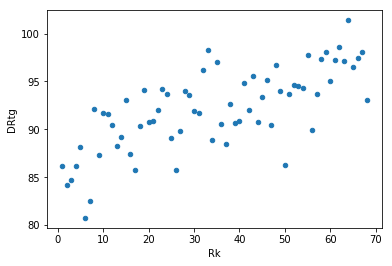

In [6]:
data.plot.scatter(x= 'Rk', y= 'DRtg')

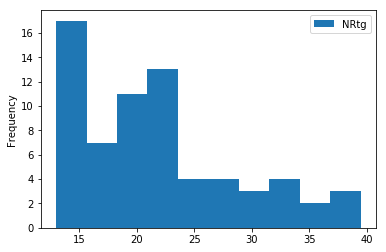

In [7]:
data.plot.hist(x='Rk', y='NRtg')

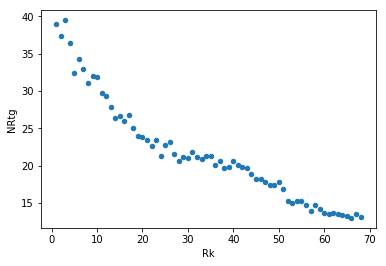

In [8]:
data.plot.scatter(x= 'Rk', y= 'NRtg')

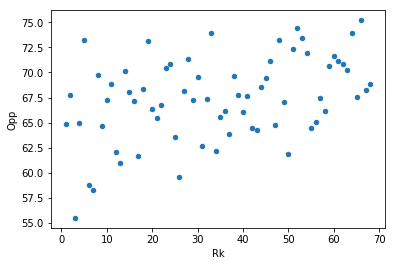

In [9]:
data.plot.scatter(x= 'Rk', y= 'Opp')

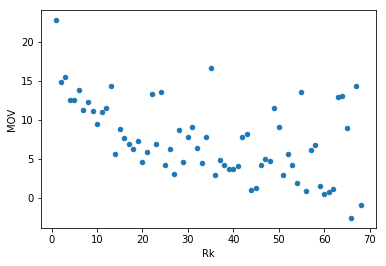

In [10]:
data.plot.scatter(x= 'Rk', y= 'MOV')

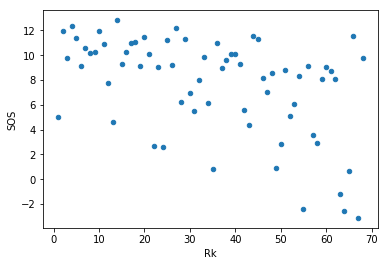

In [11]:
data.plot.scatter(x= 'Rk', y= 'SOS')

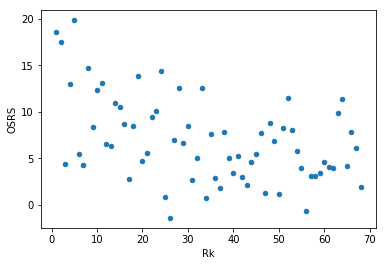

In [12]:
data.plot.scatter(x= 'Rk', y= 'OSRS')

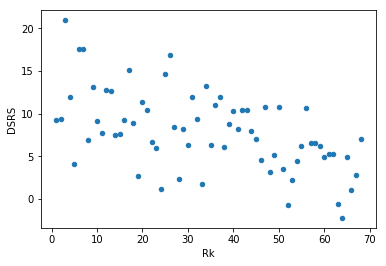

In [13]:
data.plot.scatter(x= 'Rk', y= 'DSRS')

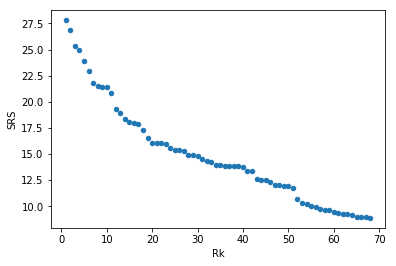

In [14]:
data.plot.scatter(x= 'Rk', y= 'SRS')

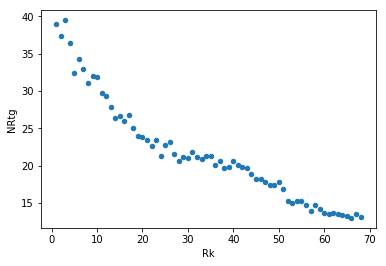

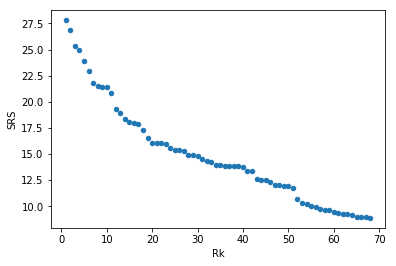

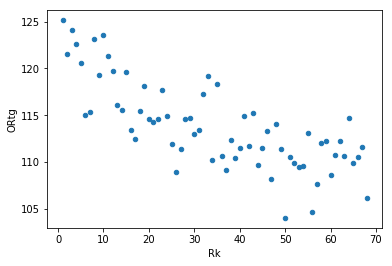

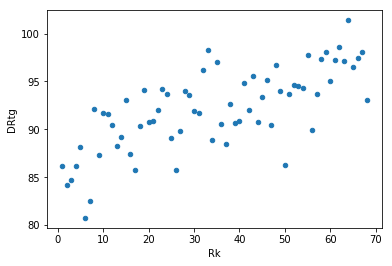

In [15]:
data_nrtg = data.plot.scatter(x= 'Rk', y= 'NRtg')
data_srs = data.plot.scatter(x= 'Rk', y= 'SRS')
data_ortg = data.plot.scatter(x= 'Rk', y= 'ORtg')
data_drtg = data.plot.scatter(x= 'Rk', y= 'DRtg')

### Correlation

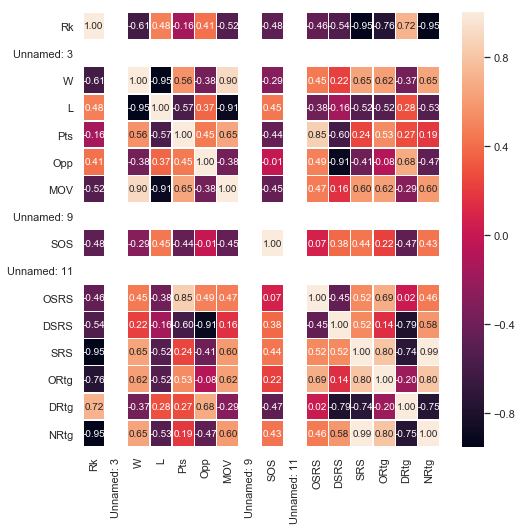

In [4]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [36]:
data

,Rk,School,Conf,W,L,Pts,Opp,MOV,SOS,OSRS,DSRS,SRS,ORtg,DRtg,NRtg
0,1,Gonzaga,WCC,33,4,87.6,64.9,22.78,5.02,18.60,9.21,27.80,125.15,86.20,38.95
1,2,Duke,ACC,32,6,82.7,67.8,14.92,11.97,17.52,9.37,26.89,121.57,84.18,37.39
2,3,Virginia,ACC,34,3,71.1,55.5,15.51,9.80,4.38,20.93,25.31,124.16,84.71,39.45
3,4,Michigan State,Big Ten,32,7,77.6,65.0,12.59,12.35,12.95,11.98,24.94,122.59,86.19,36.40
4,5,North Carolina,ACC,29,7,85.8,73.2,12.58,11.35,19.82,4.11,23.93,120.59,88.17,32.42
5,6,Texas Tech,Big 12,31,6,72.6,58.8,13.84,9.11,5.41,17.55,22.95,115.05,80.76,34.29
6,7,Michigan,Big Ten,30,7,69.6,58.3,11.27,10.56,4.25,17.58,21.83,115.38,82.52,32.87
7,8,Tennessee,SEC,31,6,82.0,69.7,12.30,10.16,14.69,6.87,21.55,123.13,92.12,31.01
8,9,Kentucky,SEC,30,7,75.8,64.7,11.14,10.29,8.31,13.12,21.43,119.35,87.29,32.06
9,10,Purdue,Big Ten,26,10,76.7,67.3,9.42,11.99,12.30,9.10,21.40,123.62,91.72,31.90
